In [261]:
# time series Library import

import os
import datetime
import pandas as pd
import numpy as np
import IPython 
import IPython.display
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [262]:
# managing figure size in the begining of the code

mpl.rcParams['figure.figsize']=(15,6)
mpl.rcParams['axes.grid']=False

In [263]:
#import the weather data set
zip_path= tf.keras.utils.get_file(
	origin= 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
 fname='jena_climate_2009_2016.csv.zip',
 extract=True,
)
csv_path,_ = os.path.splitext(zip_path)

In [264]:
#read the data into pandas

df=pd.read_csv(csv_path)
#df.to_csv('jena_climate_2009_2016.csv')
#df.to_excel('jena_climate_2009_2016.xlsx')
df.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

In [265]:
df.shape


(420551, 15)

In [266]:
df.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         420551.0     9.450147   8.423365   -23.01     3.36     9.42   
Tpot (K)         420551.0   283.492743   8.504471   250.60   277.43   283.47   
Tdew (degC)      420551.0     4.955854   6.730674   -25.01     0.24     5.22   
rh (%)           420551.0    76.008259  16.476175    12.95    65.21    79.30   
VPmax (mbar)     420551.0    13.576251   7.739020     0.95     7.78    11.82   
VPact (mbar)     420551.0     9.533756   4.184164     0.79     6.21     8.86   
VPdef (mbar)     420551.0     4.042412   4.896851     0.00     0.87     2.19   
sh (g/kg)        420551.0     6.022408   2.656139     0.50     3.92     5.59   
H2OC (mmol/mol)  420551.0     9.640223   4.235395     0.80     6.29     8.96   
rho (g/m**3)     420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79   
wv (m/s)         420551.0     1.702224  65.446714 -9999.00     0.99     1.76   
max. wv (m/s)    420551.0     3.056555  69.016932 -9999.00     1.76     2.96   
wd (deg)         420551.0   174.743738  86.681693     0.00   124.90   198.10   

                     75%      max  
p (mbar)          994.72  1015.35  
T (degC)           15.47    37.28  
Tpot (K)          289.53   311.34  
Tdew (degC)        10.07    23.11  
rh (%)             89.40   100.00  
VPmax (mbar)       17.60    63.77  
VPact (mbar)       12.35    28.32  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.80    18.13  
H2OC (mmol/mol)    12.49    28.82  
rho (g/m**3)     1242.77  1393.54  
wv (m/s)            2.86    28.49  
max. wv (m/s)       4.74    23.50  
wd (deg)          234.10   360.00

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [268]:
df.head(100)
#print all in columns
pd.set_option('display.max_rows',None)
df.head(20)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0   01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1   01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2   01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3   01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4   01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
5   01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
6   01.01.2009 01:10:00    996.50     -7.62    265.81        -8.30    94.8   
7   01.01.2009 01:20:00    996.50     -7.62    265.81        -8.36    94.4   
8   01.01.2009 01:30:00    996.50     -7.91    265.52        -8.73    93.8   
9   01.01.2009 01:40:00    996.53     -8.43    264.99        -9.34    93.1   
10  01.01.2009 01:50:00    996.62     -8.76    264.66        -9.66    93.1   
11  01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
12  01.01.2009 02:10:00    996.63     -8.85    264.57        -9.70    93.5   
13  01.01.2009 02:20:00    996.74     -8.83    264.58        -9.68    93.5   
14  01.01.2009 02:30:00    996.81     -8.66    264.74        -9.46    93.9   
15  01.01.2009 02:40:00    996.81     -8.66    264.74        -9.50    93.6   
16  01.01.2009 02:50:00    996.86     -8.70    264.70        -9.55    93.5   
17  01.01.2009 03:00:00    996.84     -8.81    264.59        -9.66    93.5   
18  01.01.2009 03:10:00    996.87     -8.84    264.56        -9.69    93.5   
19  01.01.2009 03:20:00    996.97     -8.94    264.45        -9.82    93.3   

    VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0           3.33          3.11          0.22       1.94             3.12   
1           3.23          3.02          0.21       1.89             3.03   
2           3.21          3.01          0.20       1.88             3.02   
3           3.26          3.07          0.19       1.92             3.08   
4           3.27          3.08          0.19       1.92             3.09   
5           3.33          3.14          0.19       1.96             3.15   
6           3.44          3.26          0.18       2.04             3.27   
7           3.44          3.25          0.19       2.03             3.26   
8           3.36          3.15          0.21       1.97             3.16   
9           3.23          3.00          0.22       1.88             3.02   
10          3.14          2.93          0.22       1.83             2.94   
11          3.12          2.90          0.21       1.81             2.91   
12          3.12          2.92          0.20       1.82             2.93   
13          3.13          2.92          0.20       1.83             2.93   
14          3.17          2.98          0.19       1.86             2.99   
15          3.17          2.97          0.20       1.85             2.98   
16          3.16          2.95          0.21       1.85             2.96   
17          3.13          2.93          0.20       1.83             2.94   
18          3.13          2.92          0.20       1.83             2.93   
19          3.10          2.89          0.21       1.81             2.90   

    rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0        1307.75      1.03           1.75     152.3  
1        1309.80      0.72           1.50     136.1  
2        1310.24      0.19           0.63     171.6  
3        1309.19      0.34           0.50     198.0  
4        1309.00      0.32           0.63     214.3  
5        1307.86      0.21           0.63     192.7  
6        1305.68      0.18           0.63     166.5  
7        1305.69      0.19           0.50     118.6  
8        1307.17      0.28           0.75     188.5  
9        1309.85      0.59           0.88     185.0  
10       1311.64      0.45           0.88     183.2  
11       1312.25      0.25           0.63     190.3  
12       1312.11      0.16           0.50     158.3  
13       1312.15      

In [269]:
#select the data based on the date time for every 2 hours 
df=df[11::12] # for every 2 hour data
# slice [ start:stop:step], starting from index 5 take every 6th record means every data after 1 hours :: for slicing the data start from may 
df.head(10)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
11   01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
23   01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
35   01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62    92.7   
47   01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05    92.8   
59   01.01.2009 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   
71   01.01.2009 12:00:00   1000.30     -6.87    266.27        -8.28    89.6   
83   01.01.2009 14:00:00    999.81     -5.94    267.24        -7.43    89.1   
95   01.01.2009 16:00:00    999.94     -5.40    267.76        -6.86    89.4   
107  01.01.2009 18:00:00   1000.16     -5.25    267.90        -6.75    89.1   
119  01.01.2009 20:00:00   1000.22     -4.90    268.24        -6.38    89.3   

     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
11           3.12          2.90          0.21       1.81             2.91   
23           3.07          2.85          0.23       1.78             2.85   
35           2.93          2.71          0.21       1.69             2.72   
47           3.31          3.07          0.24       1.92             3.08   
59           3.60          3.30          0.30       2.05             3.29   
71           3.64          3.27          0.38       2.03             3.26   
83           3.92          3.49          0.43       2.17             3.49   
95           4.08          3.65          0.43       2.27             3.65   
107          4.13          3.68          0.45       2.29             3.68   
119          4.24          3.79          0.45       2.36             3.78   

     rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
11        1312.25      0.25           0.63     190.3  
23        1313.61      0.10           0.38     240.0  
35        1317.71      0.05           0.50     146.0  
47        1311.65      0.72           1.25     213.9  
59        1307.76      1.45           3.00     292.6  
71        1306.98      1.84           2.63     184.4  
83        1301.67      1.25           2.00     144.0  
95        1299.17      1.40           2.13     145.5  
107       1298.68      0.55           1.00     183.7  
119       1297.05      0.68           1.13     195.2

In [270]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')


In [271]:
print(df.columns.tolist())

['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']


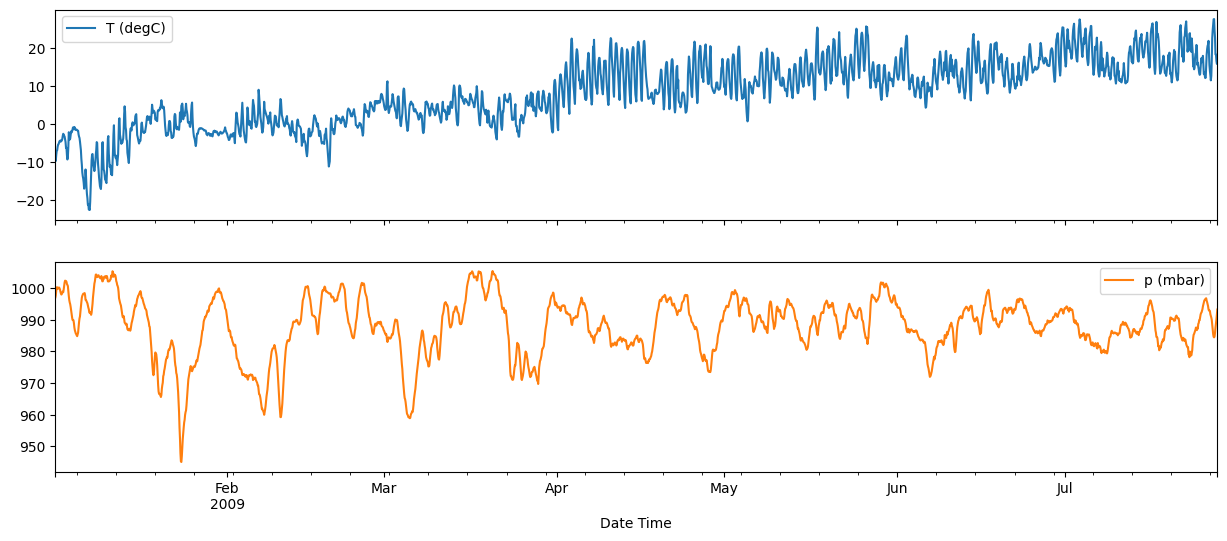

In [272]:
plot_cols= ['T (degC)', 'p (mbar)' ]
plot_features = df[plot_cols][:2500]
plot_features.index = date_time[:2500]
_= plot_features.plot(subplots=True)

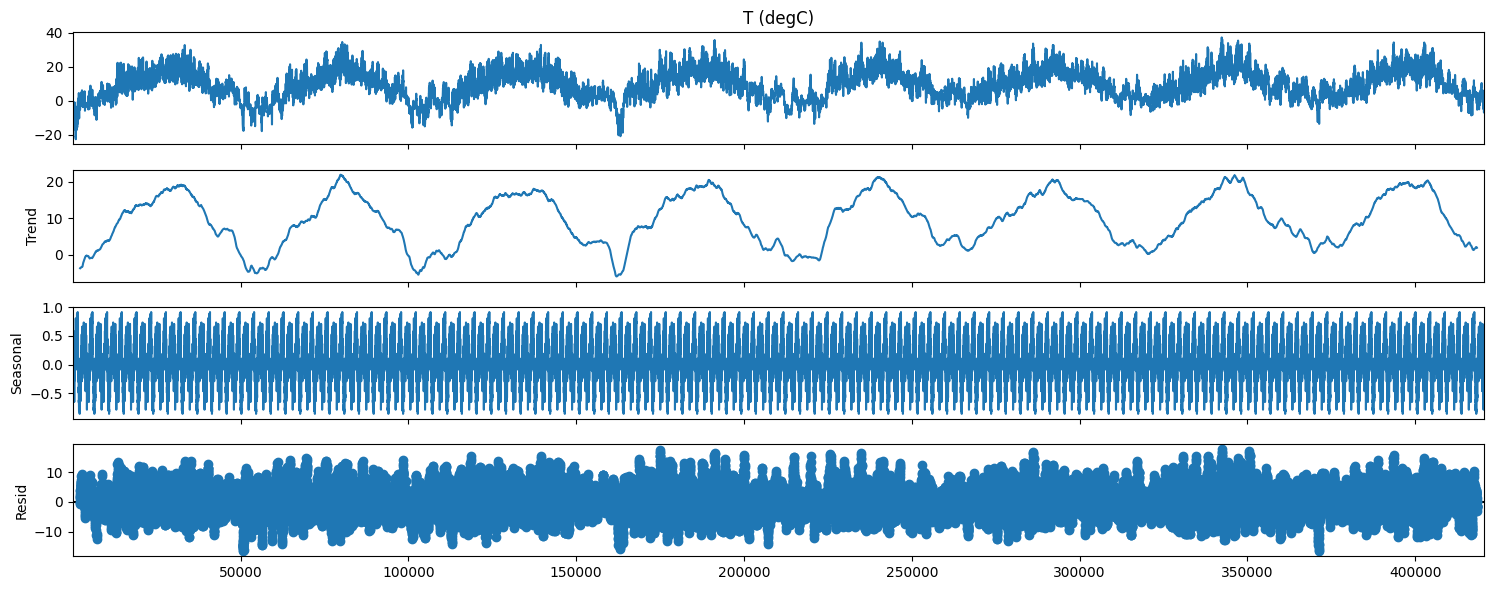

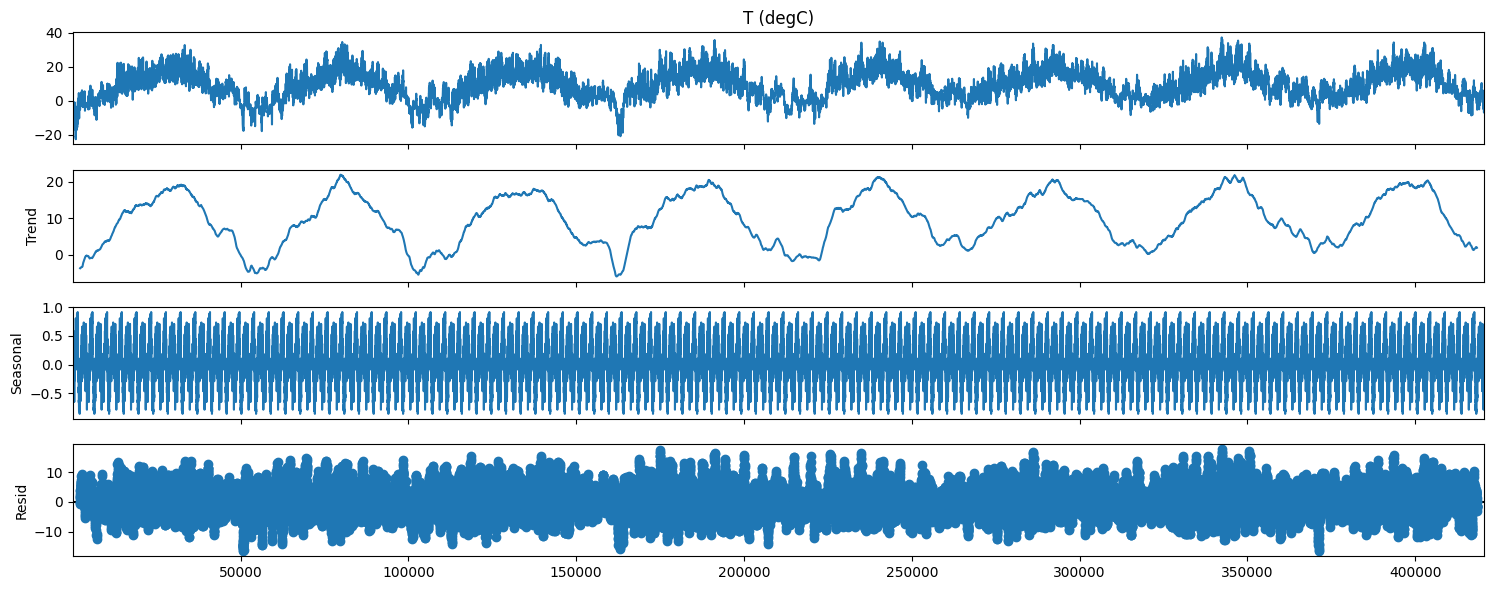

In [273]:
#let decompose the data into trends , seasonality and noise
#we will use the seasonal_function from statsmodels lo=ibrary

#decompose = seasonal_decompose(df['T (degC)'] , model = 'additive', period=1)
decompose = seasonal_decompose(df['T (degC)'] , model = 'additive', period=365)

decompose.plot()

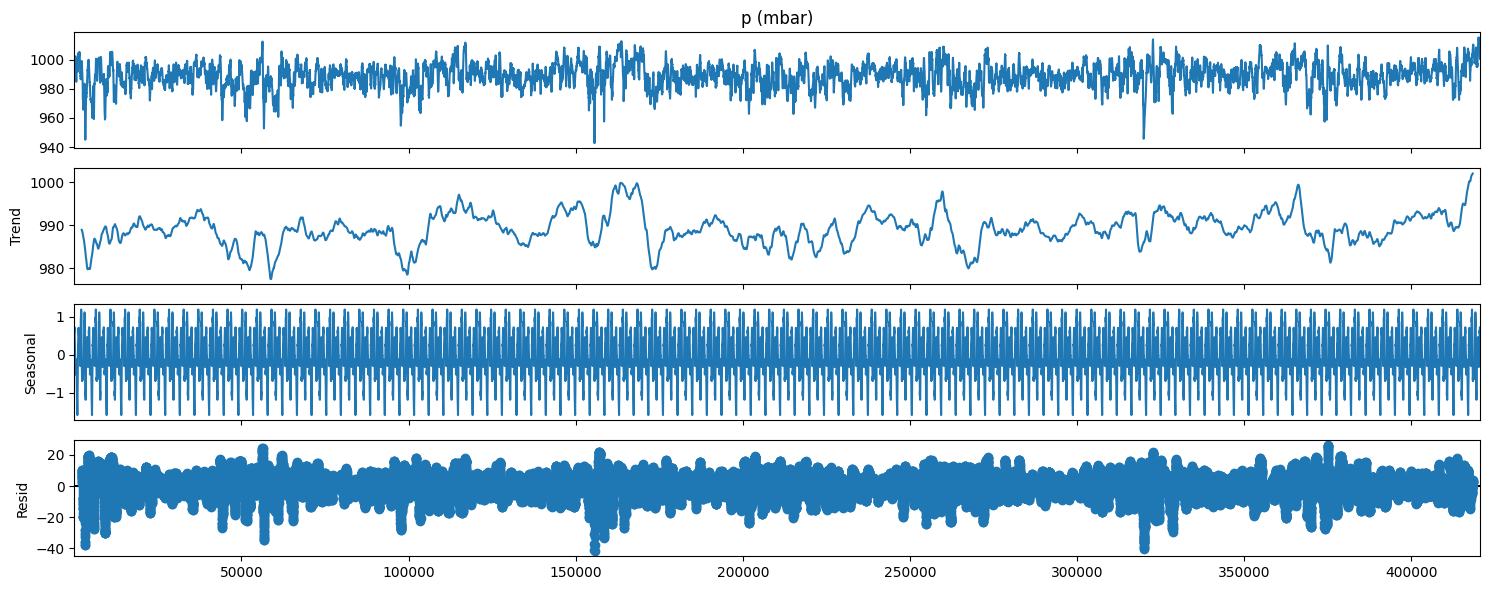

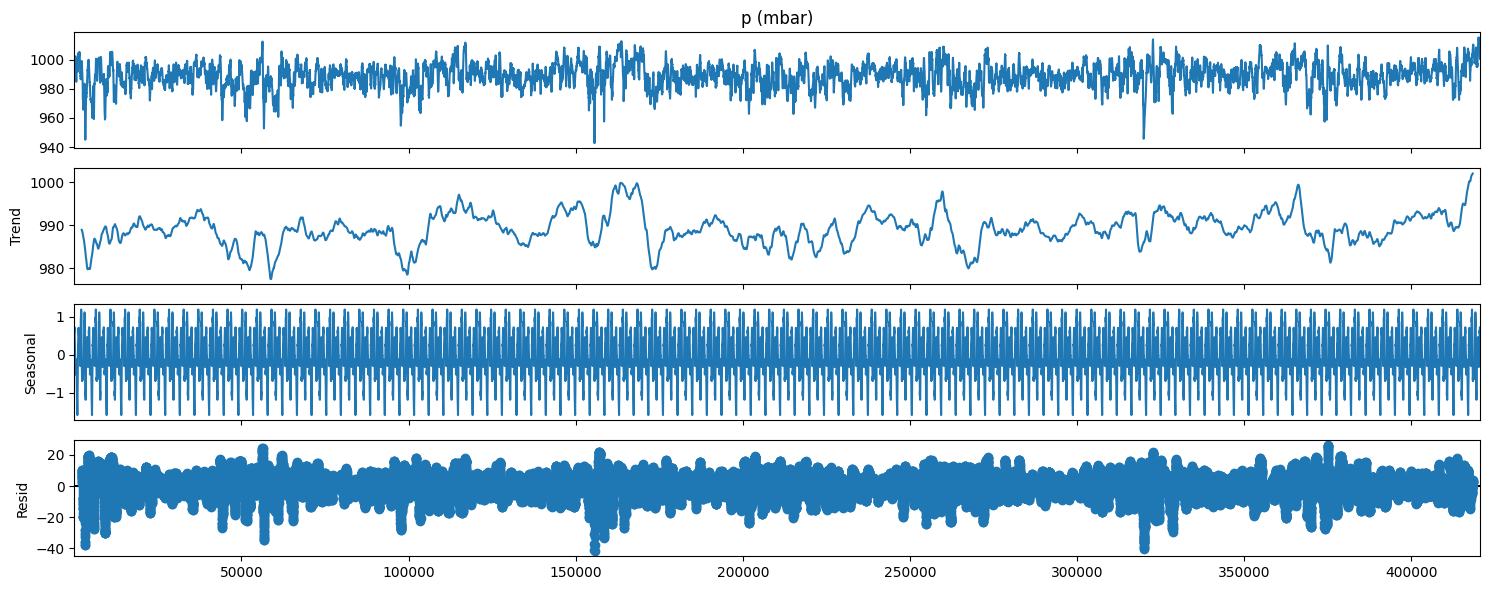

In [274]:
decompose = seasonal_decompose(df['p (mbar)'] , model = 'additive', period=365)

decompose.plot()

In [275]:
#lets plots the same plots in plotly
# always import plotly in all the main packages

fig=px.line(df,x= date_time, y='T (degC)')

## it is use to design plot of a graph
#fig.update_layout(
#	title_text='Temperature and pressure',
# xaxis_title='Date Time',
# yaxis_title='Temperature and pressure',
# font=dict(
#	 family='Courier New, monospace',
#     size=18,
#     color='#7f7f7f'
# )
#)

fig.show()
fig=px.line(df,x= date_time, y='p (mbar)',)
fig.update_traces(line_color='green')
fig.show()



In [276]:
#df.isnull().sum()
day = 24*60*60
timestamp_s = date_time.map(pd.Timestamp.timestamp)
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s *(2*np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

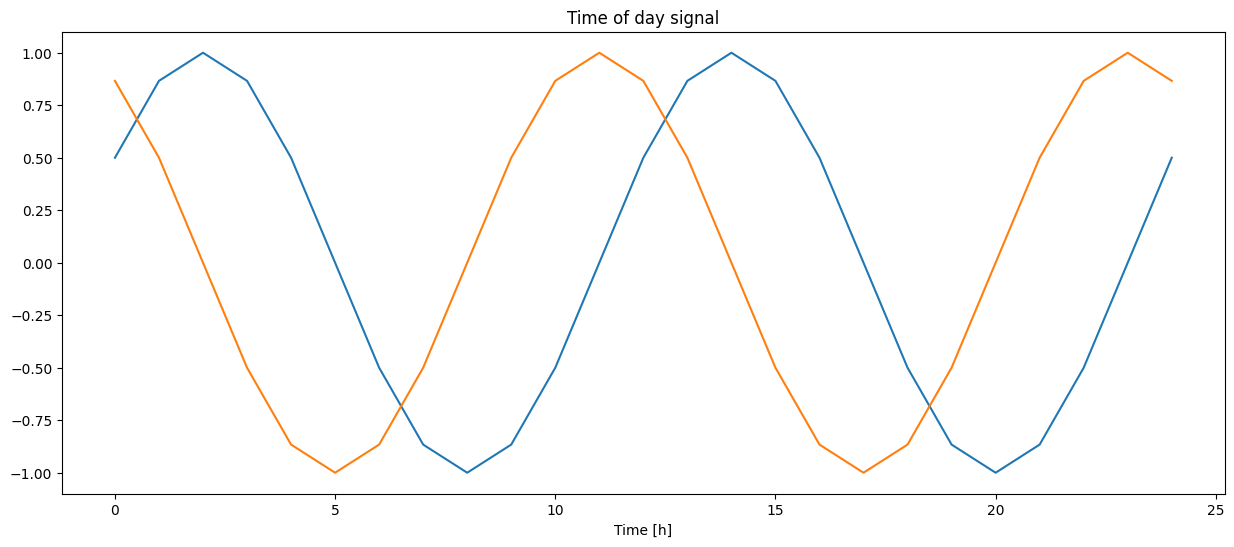

In [277]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [278]:
## rfft = real-value fast fourier transform
#fft = tf.signal.rfft(df['T (degC)'])
#f_per_dataset = np.arange(0,len(fft))
#
#
#n_samples_h = len(df['T (degC)'])
#hours_per_years = 24*365.2524
#
#year_per_dataset = n_samples_h/(hours_per_years)
#
#f_per_year = f_per_dataset/year_per_dataset
#
#plt.step(f_per_year, np.abs(fft))
#plt.xscale('log')
#
#plt.ylim(0,400000)
#
#plt.xlim([0.1,max(plt.xlim())])
#
#plt.xtricks([1,365.2524], labels['1/Year', '1/day'])
#
#_= plt.xlabel('Frequency (log scale)')


In [279]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [280]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

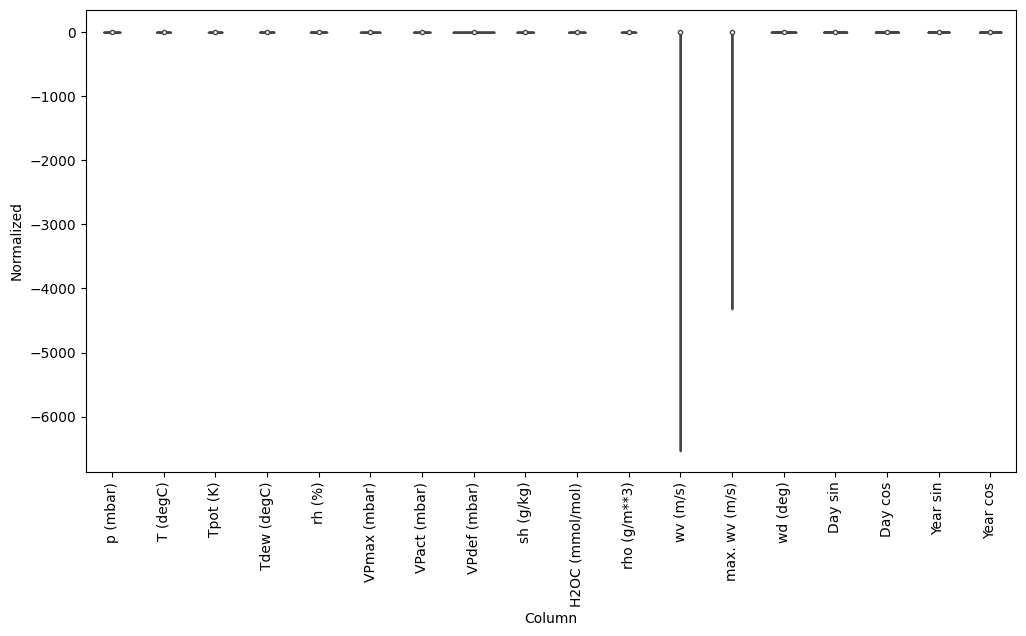

In [281]:
df_std = (df - train_mean)/train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax= sns.violinplot(x='Column',y='Normalized',data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [282]:
class WindowGenerator():
  
    
  def split_window(self, features):
        input_data = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )

        return input_data, labels
  
  
  
   
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  

In [283]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [284]:
w2= WindowGenerator(
	input_width=6,
 label_width=1,
 shift=1,
 label_columns=["T (degC)"]
)
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

In [285]:
def split_window(self, features):
    inputs = features[:, self.input_slice,:]
    labels = features[:, self.label_slice,:]
    if self.label_columns is not None:
        labels = tf.stack(
			[labels[:,:, self.column_indices[name]] for name in self.label_columns],
            axis=-1
		)
        
        #Slicing does'nt preserve statics shape information , so set the shapes
        # manually. This way the 'tf.data.Datasets' are easier to inspects.
        
        inputs.set_shape([None, self.input_width,None])
        labels.set_shape([None, self.label_width,None])
        return inputs, labels
    
    WindowGenerator.split_window = split_window
        

In [286]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

#example_inputs, example_labels = w2.split_window(example_window)
#
#print('All shapes are: (batch, time, features)')
#print(f'Window shape: {example_window.shape}')
#print(f'Inputs shape: {example_inputs.shape}')
#print(f'Labels shape: {example_labels.shape}')

In [287]:
example_inputs, example_labels = w2.split_window(example_window)

In [288]:
w2.example = example_inputs, example_labels

In [289]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

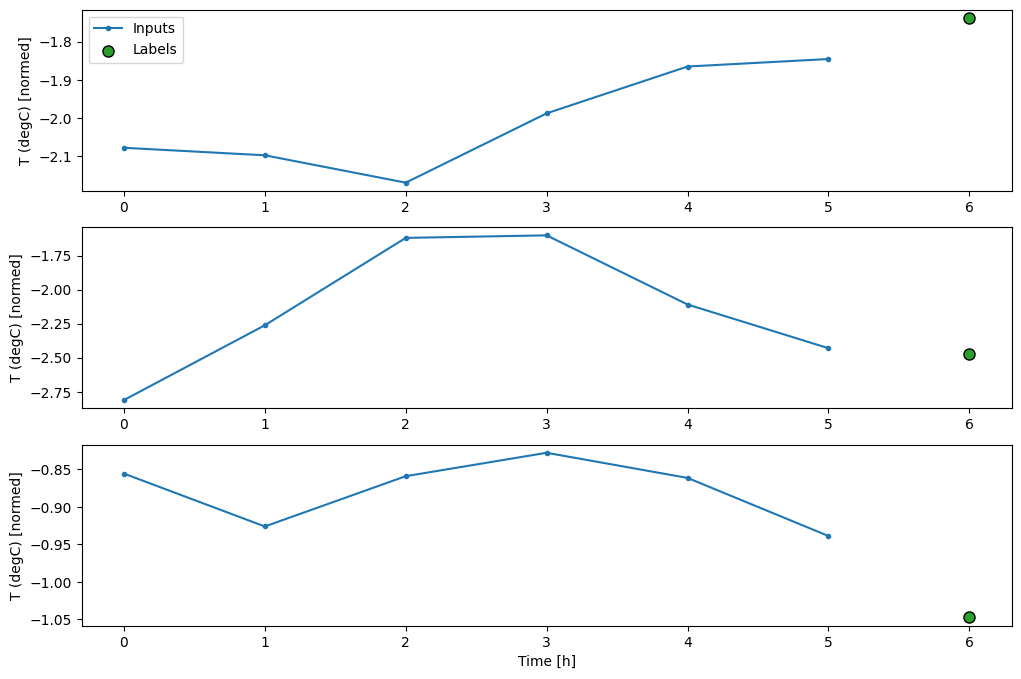

In [290]:
w2.plot()

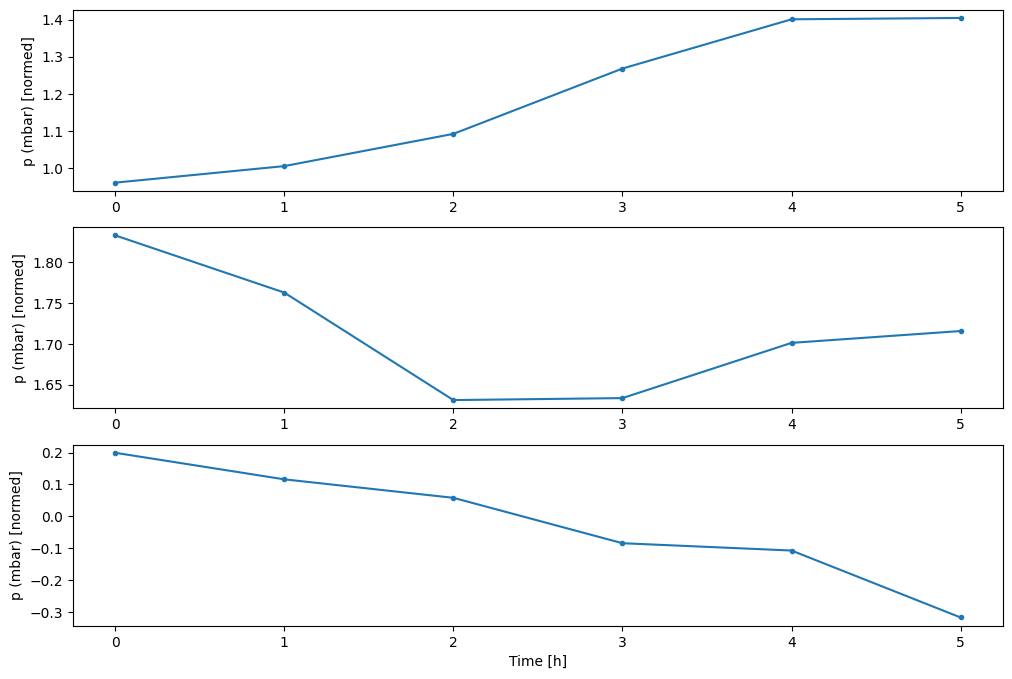

In [291]:
w2.plot(plot_col='p (mbar)')

In [292]:
# to create tf.datasets
# make_dataset methods will take a time series DataFrame and convert it a tf.data.Dataset of 
# (input_windows ,  label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array
# function

def make_dataset(self,data):
    data= np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
		data=data,
  targets=None,
  sequence_length= self.total_window_size,
  sequence_stride=1,
  shuffle=True,
  batch_size=32,
	)
    
    ds = ds.map(self.split_window)
    return ds

WindowGenerator.make_dataset=make_dataset

In [293]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [294]:
w2.train.element_spec

(TensorSpec(shape=(None, None, 18), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, None, 1), dtype=tf.float32, name=None))

In [295]:
for example_inputs,example_labels in w2.train.take(1):
    print(f'Inputs shape (batch,time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')
    

Inputs shape (batch,time, features): (32, 6, 18)
Labels shape (batch, time, features): (32, 1, 1)


In [296]:
single_step_window = WindowGenerator(
	input_width=1,label_width=1, shift=1,
 label_columns=['T (degC)']
) 
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [297]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features) : {example_inputs.shape}')
    print(f'Labels shape (batch, time, features) : {example_labels.shape}')

Inputs shape (batch, time, features) : (32, 1, 18)
Labels shape (batch, time, features) : (32, 1, 1)


In [298]:

class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [299]:
baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

219/219 [==============================] - 4s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.1417


In [300]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [301]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 18)
Output shape: (32, 24, 1)


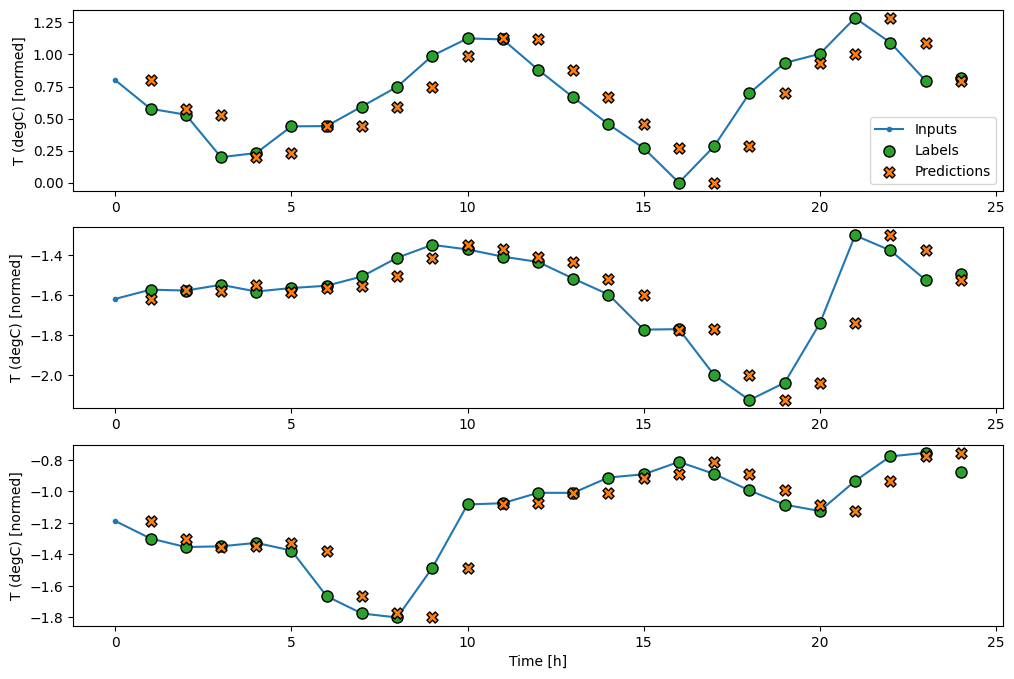

In [302]:
wide_window.plot(baseline)

In [303]:
linear= tf.keras.Sequential([
	tf.keras.layers.Dense(units=1)
])

print('Input shape:', single_step_window.example[0].shape)
print('Output shape:',linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 18)
Output shape: (32, 1, 1)


In [304]:
MAX_EPOCHS = 20

def complie_and_fit(model,window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min'
        )
    
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[tf.keras.metrics.MeanSquaredError()]
                  )
    
    history=model.fit(
		window.train,epochs=MAX_EPOCHS,
  validation_data=window.val,
  callbacks=[early_stopping]
	)
    
    return history

In [305]:
history = complie_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)

performance['Linear'] = linear.evaluate(single_step_window.test,verbose=0)

Epoch 1/20
767/767 [==============================] - 12s 13ms/step - loss: 0.3246 - mean_squared_error: 0.3246 - val_loss: 46.0403 - val_mean_squared_error: 46.0403
Epoch 2/20
767/767 [==============================] - 12s 16ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 15.6053 - val_mean_squared_error: 15.6053
Epoch 3/20
767/767 [==============================] - 11s 14ms/step - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 1.8869 - val_mean_squared_error: 1.8869
Epoch 4/20
767/767 [==============================] - 11s 14ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 5/20
767/767 [==============================] - 11s 14ms/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.1093 - val_mean_squared_error: 0.1093
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 1.1774 - mean_squared_error: 1.1774


In [306]:
print('Input shape:',wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 18)
Output shape: (32, 24, 1)


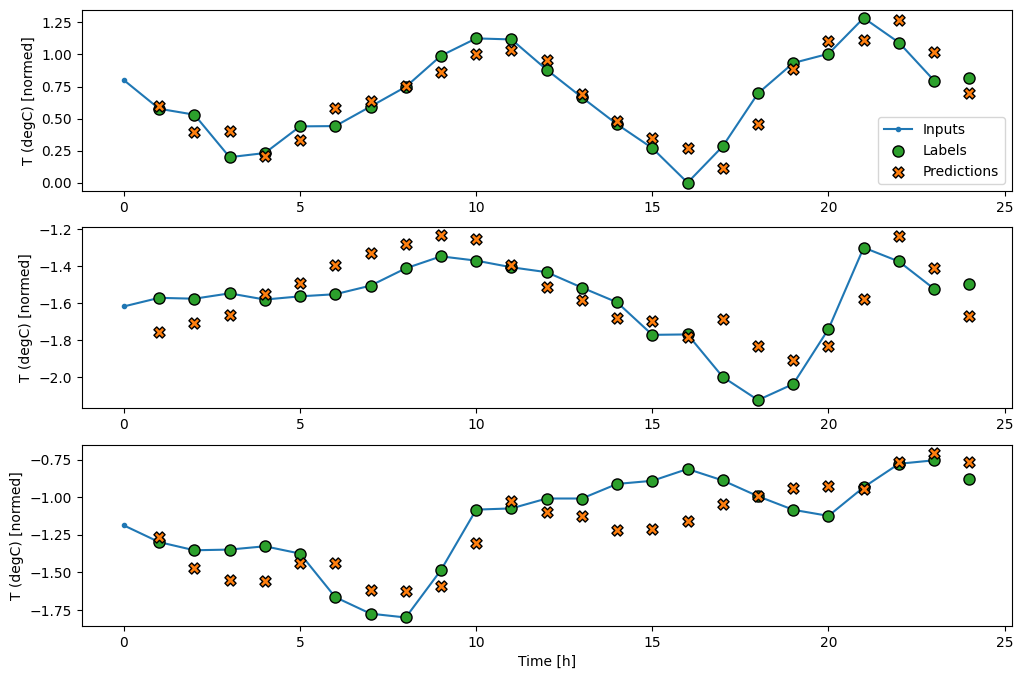

In [307]:
wide_window.plot(linear)

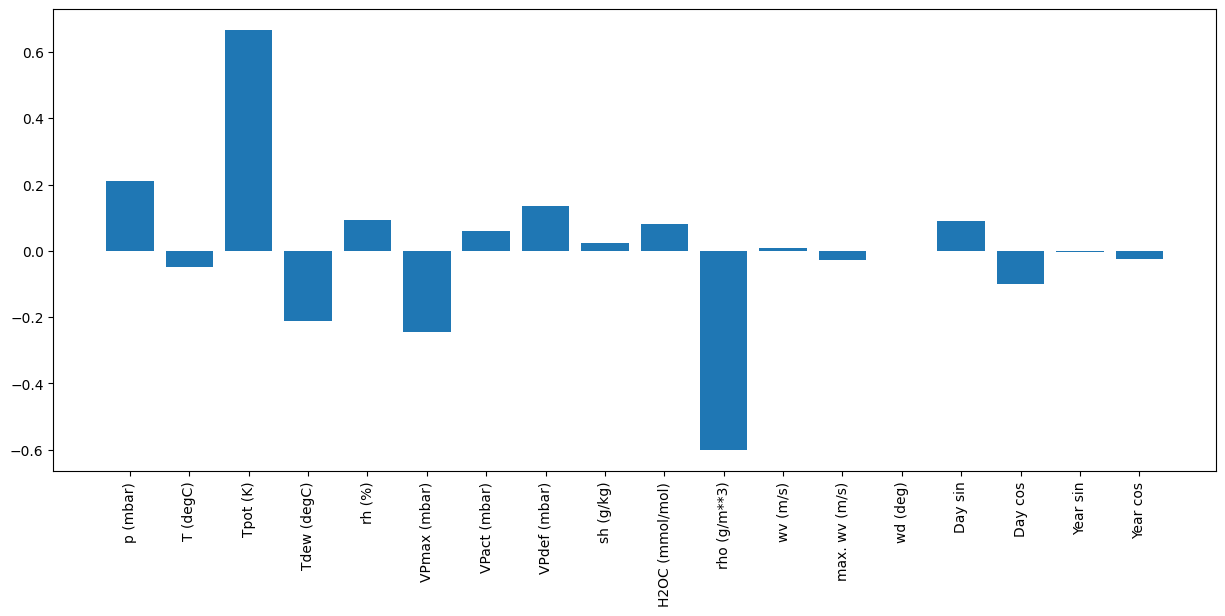

In [308]:
plt.bar(x=range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy()
        )
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns,rotation=90)

In [309]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])



In [310]:
history = complie_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
767/767 [==============================] - 16s 15ms/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 3.7533 - val_mean_squared_error: 3.7533
Epoch 2/20
767/767 [==============================] - 12s 16ms/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 14.9133 - val_mean_squared_error: 14.9133
Epoch 3/20
219/219 [==============================] - 2s 10ms/step - loss: 16.1048 - mean_squared_error: 16.1048


In [311]:
CONV_WIDTH=3
conv_window = WindowGenerator(
	input_width= CONV_WIDTH,
 label_width=1,
 shift=1,
 label_columns=['T (degC)']
)

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

Text(0.5, 1.0, 'Give 3 hours of inputs, predict 1 hour into the future.')

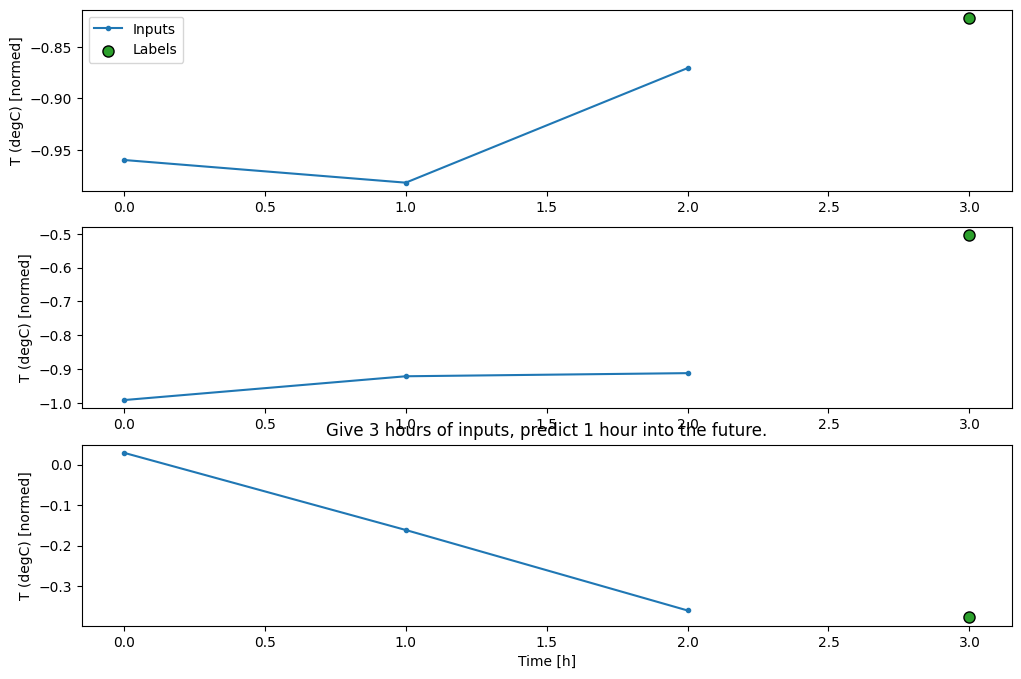

In [312]:
conv_window.plot()
plt.title("Give 3 hours of inputs, predict 1 hour into the future.")

In [313]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [314]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 18)
Output shape: (32, 1, 1)


In [315]:
history=complie_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

219/219 [==============================] - 1s 3ms/step - loss: 8.0763 - mean_squared_error: 8.0763


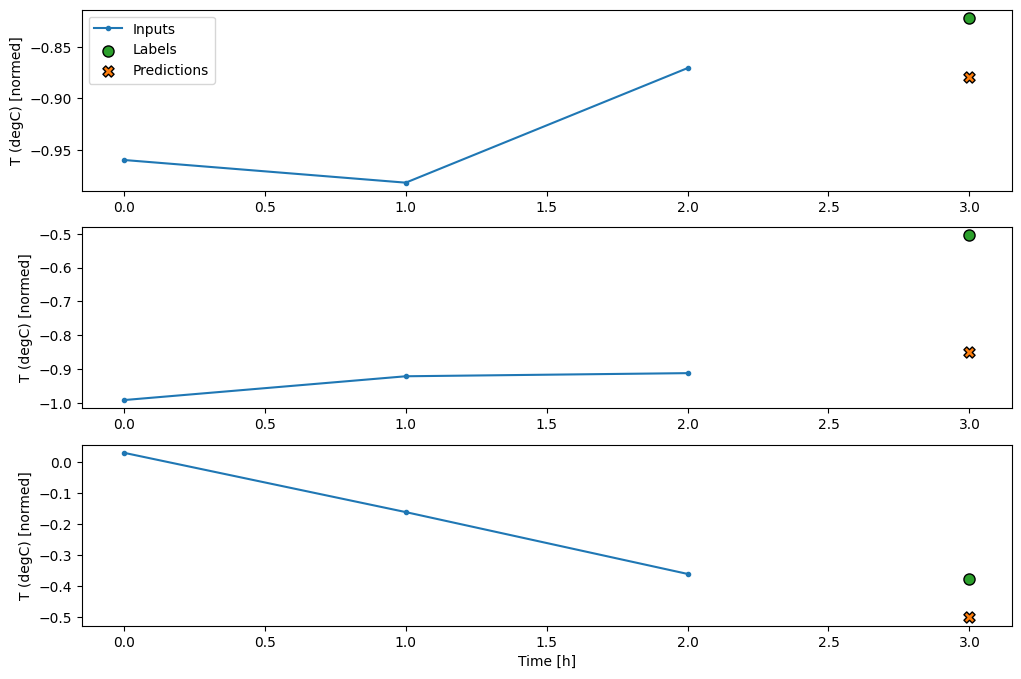

In [316]:
conv_window.plot(multi_step_dense)

In [317]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
    
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 18)

ValueError:Exception encountered when calling layer 'sequential_13' (type Sequential).

Input 0 of layer "dense_22" is incompatible with the layer: expected axis -1 of input shape to have value 54, but received input with shape (32, 432)

Call arguments received by layer 'sequential_13' (type Sequential):
  • inputs=tf.Tensor(shape=(32, 24, 18), dtype=float32)
  • training=None
  • mask=None


In [318]:
conv_model= tf.keras.Sequential([
	tf.keras.layers.Conv1D(
		filters=32,
        kernel_size=(CONV_WIDTH,),
        activation='relu'
	),
 tf.keras.layers.Dense(units=32,activation='relu'),
 tf.keras.layers.Dense(units=1) ,
])

In [319]:
print("Conv model on `conv_window`")
print('Input size:', conv_window.example[0].shape)
print('Output size:',conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input size: (32, 3, 18)
Output size: (32, 1, 1)


In [320]:
history = complie_and_fit(conv_model,conv_window)
IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv' ] = conv_model.evaluate(conv_window.test, verbose=0)

219/219 [==============================] - 1s 4ms/step - loss: 14.3566 - mean_squared_error: 14.3566


In [321]:
print("Wide window")
print('Input shape', wide_window.example[0].shape)
print('Labels shape', wide_window.example[1].shape)
print('Output shape', conv_model(wide_window.example[0]).shape)

Wide window
Input shape (32, 24, 18)
Labels shape (32, 24, 1)
Output shape (32, 22, 1)


In [322]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH-1)
wide_conv_window = WindowGenerator(
	input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)']
)

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

In [323]:
print("Wide conv window")
print('Input shape:' , wide_conv_window.example[0].shape)
print('Labels shape', wide_conv_window.example[1].shape)
print('Outputs shape',conv_model(wide_conv_window.example[0]).shape)

Wide conv window


Input shape: (32, 26, 18)
Labels shape (32, 24, 1)
Outputs shape (32, 24, 1)


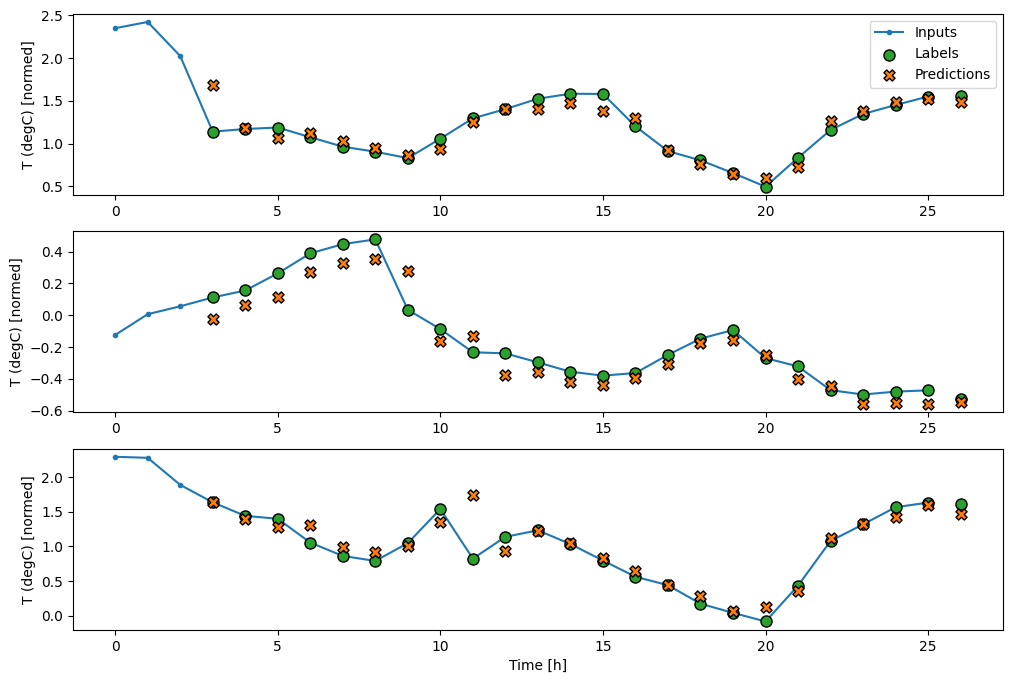

In [324]:
wide_conv_window.plot(conv_model)

In [325]:
lstm_model = tf.compat.v1.keras.models.Sequential([
	tf.keras.layers.LSTM(32,return_sequences=True),
 tf.keras.layers.Dense(units=1)
])

In [326]:
print("Input shape:", wide_window.example[0].shape)
print('Output shape:' , lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 18)
Output shape: (32, 24, 1)


In [327]:
history= complie_and_fit(lstm_model,wide_window)
IPython.display.clear_output()
val_performance['LSTM'] =lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

219/219 [==============================] - 1s 5ms/step - loss: 0.0130 - mean_squared_error: 0.0130


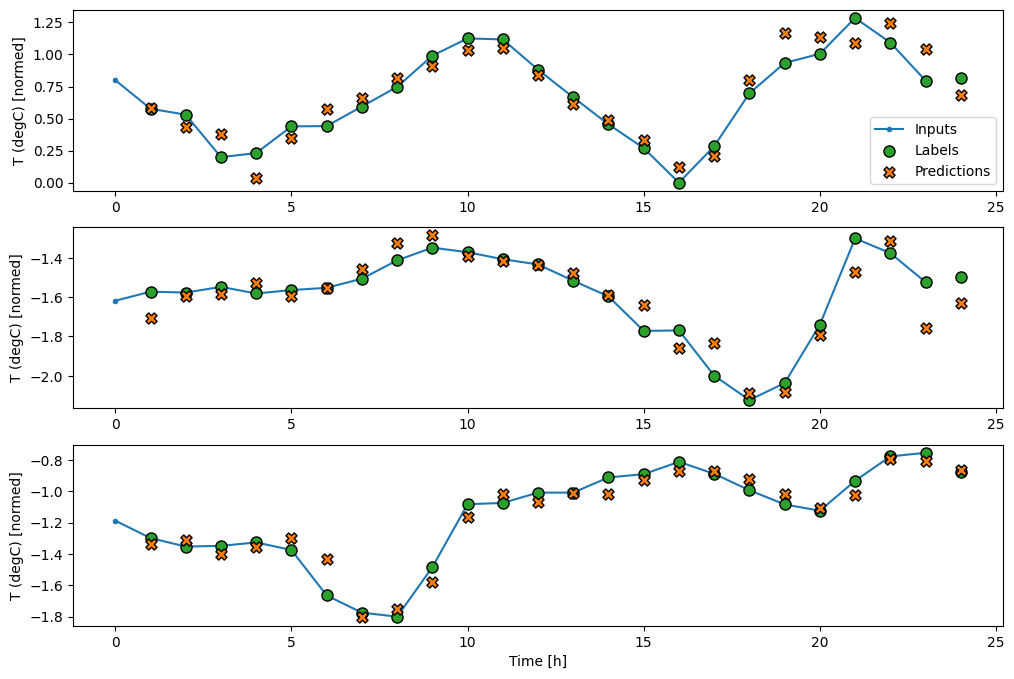

In [328]:
wide_window.plot(lstm_model)

In [329]:
print("Available Metrics:", lstm_model.metrics_names)


Available Metrics: ['loss', 'mean_squared_error']


In [330]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

ValueError: 'mean_absolute_error' is not in list

In [ ]:
print("Available Metrics:", lstm_model.metrics_names)


Available Metrics: []
